In [1]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
# Simulate data
X, y = make_moons(n_samples=100, noise=0.2)

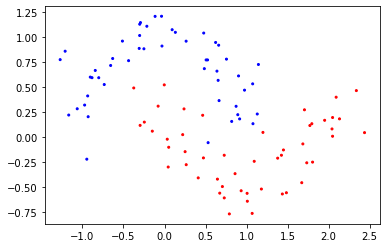

In [11]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',s=4)

In [8]:
def plot_svm_nonlinear(x, y, model_class, **model_params):
    #Fit model
    model = model_class(**model_params)
    model.fit(x, y)
    
    #Define grid
    h = .001     
    x_min, x_max = x[:, 0].min() - 0.2, x[:, 0].max() + 0.2
    y_min, y_max = x[:, 1].min() - 0.2, x[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    #Prediction on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    #Contour + scatter plot
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.4, cmap='coolwarm')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.yticks(np.arange(-0.75, 1.75, step=0.5))

    return plt

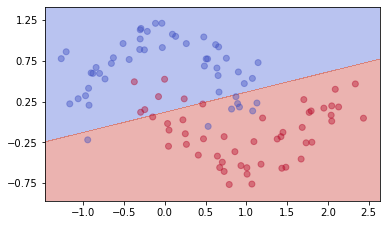

In [9]:
plot_svm_nonlinear(X,y,svm.SVC,C=1,kernel='linear')
plt.savefig('nonlinear1.png', transparent=True, dpi=200)
#plt.clf()

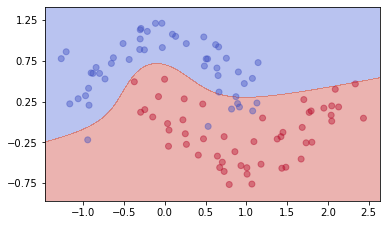

In [10]:
plot_svm_nonlinear(X,y,svm.SVC,C=100,kernel='poly',degree=3)
plt.savefig('nonlinear2.png', transparent=True, dpi=200)
#plt.clf()